# 4.10 Coding Etiquette & Excel Reporting

# Part 1

# Table of Contents

## 1. Importing Libraries and DataFrame

## 2. Security Implications of PII Data

## 3. Customer Behavior by US States
### 3a. Create a “Region” column based on the “State” column from your customers data set.
### 3b. Determine whether there’s a difference in spending habits between the different U.S. regions.

## 4. Excluding low-activity customers from the dataset

## 5. Creating a profiling variable

## 6. Visualizing customer profiles

## 7. Aggregating usage frequency and expenditure by customer profile

## 8. Comparing customer profiles with regions and departments
### 8a. Customer profiles per region
### 8b. Customer profiles per department

# 1. Importing Libraries and DataFrame

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining the pathname
path = r'/Users/iMac/Library/CloudStorage/OneDrive-Personal/Data Analytics/Data Analytics Immersion/Exercise 4/2024-01_Instacart Basket Analysis'

In [3]:
# Importing the df
df = pd.read_pickle(os.path.join(path, '02 Data', '00 Prepared Data', 'ords_prods_cust.pkl'))

# 2. Security Implications of PII Data

In [4]:
# Checking the df columns
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_freq',
       'spending_flag', 'order_freq', 'order_frequency_flag', 'Surname',
       'Gender', 'STATE', 'Age', 'date_joined', 'number_of_dependents',
       'marital_status', 'income'],
      dtype='object')

## Observations:
Columns such as 
**'product_id'
'product_name'
'user_id'
'Surname'
'Gender'
'STATE'
'Age'
'date_joined'
'number_of_dependents'
'marital_status'
'income'** 
may contain sensitive information. 

From among these columns, the following are not directly relevant to the analysis goals and are therefore dropped:

**'Surname,' 'Gender,' 'date_joined,'** and **'marital_status'**

In [5]:
# Dropping columns at risk of violating PII regulations
df.drop(['Surname', 'Gender', 'date_joined', 'marital_status'], axis=1, inplace=True)

In [6]:
# Checking the columns of the new df
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_freq',
       'spending_flag', 'order_freq', 'order_frequency_flag', 'STATE', 'Age',
       'number_of_dependents', 'income'],
      dtype='object')

In [8]:
# Checking the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  spending_freq           float64 
 21  spendi

# 3. Customer Behavior by US States

### 3a. Create a “Region” column based on the “STATE” column from your customers data set.

In [9]:
# Checking the shape of the 'STATE' column to determine whether it contains state abbreviations or full names
df['STATE'].head()

0    Minnesota
1    Minnesota
2      Vermont
3    Wisconsin
4    Wisconsin
Name: STATE, dtype: object

In [10]:
# Defining a function to map states to regions
def map_region(state):
    northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
    midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
    south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
    west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
    
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'

In [11]:
# Applying the function to the 'STATE' column to create the 'Region' column
df['Region'] = df['STATE'].apply(map_region)

In [12]:
# Checking the 'Region' column
df['Region'].head()

0      Midwest
1      Midwest
2    Northeast
3      Midwest
4      Midwest
Name: Region, dtype: object

### 3b. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [13]:
# Finding the frequency of spender types
df['spending_flag'].value_counts(dropna=False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [14]:
# Creating a PivotTable to analyze spending distribution per region
spender_per_region = df.pivot_table(index='Region', columns='spending_flag', aggfunc = 'size', fill_value = 0)

In [15]:
# Displaying the PivotTable
spender_per_region

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [16]:
# Determining the total number of spender types per region
spender_per_region['Total Spenders'] = spender_per_region['High spender'] + spender_per_region['Low spender']
spender_ranking_per_region = spender_per_region.sort_values(by='High spender', ascending=False)

In [17]:
# Displaying the ranking
spender_ranking_per_region

spending_flag,High spender,Low spender,Total Spenders
Region,,,
South,209691,10582194,10791885
West,160354,8132559,8292913
Midwest,155975,7441350,7597325
Northeast,108225,5614511,5722736


#### The analysis provides insights into user spending behavior across regions, with the highest total number of spenders found in the **South,** followed by the **West,** **Midwest,** and **Northeast.** 

In the **South,** there are 209,691 high spenders and 10,582,194 low spenders.

The **West** region has 160,354 high spenders and 8,132,559 low spenders.

In the **Midwest,** 155,975 users are classified as high spenders, with 7,441,350 identified as low spenders.

The **Northeast** region, while still substantial, has 108,225 high spenders and 5,614,511 low spenders.

This ordering highlights the varying user spending patterns across the regions, with the South having the largest overall spender base.

# 4. Excluding low-activity customers from the dataset

In [18]:
# Creating an exclusion flag for low-activity customers (less than 5 orders)
df['low_activity'] = df['max_order'] < 5

In [19]:
# Filtering out low-activity customers
df_active_customers = df[~df['low_activity']]

In [20]:
df_active_customers.shape

(30964564, 30)

# 1,430,294 rows were excluded

In [21]:
# Exporting the new df_active_customers to .pkl
df_active_customers.to_pickle(os.path.join(path, '02 Data', '00 Prepared Data', 'active_customers.pkl'))

# 5. Creating a profiling variable.

## Age Profiles

In [22]:
# Conducting a descriptive analysis of the 'Age' column to determine the criteria for age profiles
df_active_customers['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

### Based on the descriptive analysis of the 'Age' column, the following age profiles are proposed:

1. **Young Adult (18-30):** Customers in this age range may exhibit preferences for trendy and tech-savvy products. They might be more responsive to promotions and discounts.

2. **Middle-Aged (31-50):** This group may have established households and families, showing interest in family-oriented and household products. They might value convenience and time-saving options.

3. **Mature (51-65):** This demographic may focus on health and wellness, home improvement, and leisure activities. They may be interested in products that enhance their lifestyle.

4. **Senior (66-81):** This group might prioritize health-related products, convenience items, and services catering to their specific needs. They may be more brand loyal and appreciate personalized offerings.

In [23]:
# Creating the 'age_flag' column for Young Adult (18-30)
df_active_customers.loc[df_active_customers['Age'].between(18, 30), 'age_flag'] = "Young Adult"

/var/folders/6c/bwpb08p57j1fmq58t70xfnf80000gq/T/ipykernel_79890/374947998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_customers.loc[df_active_customers['Age'].between(18, 30), 'age_flag'] = "Young Adult"


In [24]:
# Creating the 'age_flag' column for Middle-Aged (31-50)
df_active_customers.loc[df_active_customers['Age'].between(31, 50), 'age_flag'] = "Middle-Aged"

In [25]:
# Creating the 'age_flag' column for Mature Adult (51-65)
df_active_customers.loc[df_active_customers['Age'].between(51, 65), 'age_flag'] = "Mature"

In [26]:
# Creating the 'age_flag' column for Senior (66-81)
df_active_customers.loc[df_active_customers['Age'].between(66, 81), 'age_flag'] = "Senior"

In [27]:
# Checking the frequency of the 'age_flag' column
df_active_customers['age_flag'].value_counts(dropna=False)

age_flag
Middle-Aged    9712825
Senior         7730834
Mature         7216665
Young Adult    6304240
Name: count, dtype: int64

## Income Profiles

In [28]:
# Conducting a descriptive analysis of the 'income' column to determine the criteria for income profiles
df_active_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

### Based on the descriptive analysis of the 'income' column, the following income profiles are proposed:

1. **Low-Income:** Customers with income less than or equal to 67,000 USD (25th percentile).

2. **Middle-Income:** Customers with income between 67,000 and 128,000 USD (between 25th and 75th percentiles).

3. **High-Income:** Customers with income greater than 128,000 USD (75th percentile).

In [29]:
# Creating the 'income_flag' column for Low-Income Customers
df_active_customers.loc[df_active_customers['income'] < 67000, 'income_flag'] = "Low-Income"

/var/folders/6c/bwpb08p57j1fmq58t70xfnf80000gq/T/ipykernel_79890/824922385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_customers.loc[df_active_customers['income'] < 67000, 'income_flag'] = "Low-Income"


In [30]:
# Creating the 'income_flag' column for Middle-Income Customers
df_active_customers.loc[df_active_customers['income'].between(67000, 128000), 'income_flag'] = "Middle-Income"

In [31]:
# Creating the 'income_flag' column for High-Income Customers
df_active_customers.loc[df_active_customers['income'] > 128000, 'income_flag'] = "High-Income"

In [32]:
# Checking the frequency of the 'income_flag' column
df_active_customers['income_flag'].value_counts(dropna=False)

income_flag
Middle-Income    15549969
High-Income       7753117
Low-Income        7661478
Name: count, dtype: int64

In [33]:
# Checking the customer profile distribution
df_active_customers[['income_flag','age_flag']].value_counts().reset_index(name='customer_profile_count')

,income_flag,age_flag,customer_profile_count
0,Middle-Income,Middle-Aged,4919109
1,Middle-Income,Senior,3781091
2,Middle-Income,Mature,3498879
3,Middle-Income,Young Adult,3350890
4,High-Income,Senior,2960966
5,Low-Income,Young Adult,2882135
6,Low-Income,Middle-Aged,2841902
7,High-Income,Mature,2769122
8,High-Income,Middle-Aged,1951814
9,Low-Income,Senior,988777


In [34]:
# Defining the conditions for customer profiling
conditions = [
    (df_active_customers['age_flag'] == 'Young Adult') & (df_active_customers['income_flag'] == 'Low-Income'),
    (df_active_customers['age_flag'] == 'Young Adult') & (df_active_customers['income_flag'] == 'Middle-Income'),
    (df_active_customers['age_flag'] == 'Young Adult') & (df_active_customers['income_flag'] == 'High-Income'),
    
    (df_active_customers['age_flag'] == 'Middle-Aged') & (df_active_customers['income_flag'] == 'Low-Income'),
    (df_active_customers['age_flag'] == 'Middle-Aged') & (df_active_customers['income_flag'] == 'Middle-Income'),
    (df_active_customers['age_flag'] == 'Middle-Aged') & (df_active_customers['income_flag'] == 'High-Income'),
    
    (df_active_customers['age_flag'] == 'Mature') & (df_active_customers['income_flag'] == 'Low-Income'),
    (df_active_customers['age_flag'] == 'Mature') & (df_active_customers['income_flag'] == 'Middle-Income'),
    (df_active_customers['age_flag'] == 'Mature') & (df_active_customers['income_flag'] == 'High-Income'),
    
    (df_active_customers['age_flag'] == 'Senior') & (df_active_customers['income_flag'] == 'Low-Income'),
    (df_active_customers['age_flag'] == 'Senior') & (df_active_customers['income_flag'] == 'Middle-Income'),
    (df_active_customers['age_flag'] == 'Senior') & (df_active_customers['income_flag'] == 'High-Income'),
]

# Defining the corresponding customer profiles
profiles = [
    'Low-Income Young Adult', 'Middle-Income Young Adult', 'High-Income Young Adult',
    'Low-Income Middle-Aged', 'Middle-Income Middle-Aged', 'High-Income Middle-Aged',
    'Low-Income Mature', 'Middle-Income Mature', 'High-Income Mature',
    'Low-Income Senior', 'Middle-Income Senior', 'High-Income Senior',
]

# Creating the 'age_income_profile' column based on the conditions
df_active_customers['age_income_profile'] = np.select(conditions, profiles, default='Other')

/var/folders/6c/bwpb08p57j1fmq58t70xfnf80000gq/T/ipykernel_79890/1650056115.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_customers['age_income_profile'] = np.select(conditions, profiles, default='Other')


# 6. Visualizing customer profiles

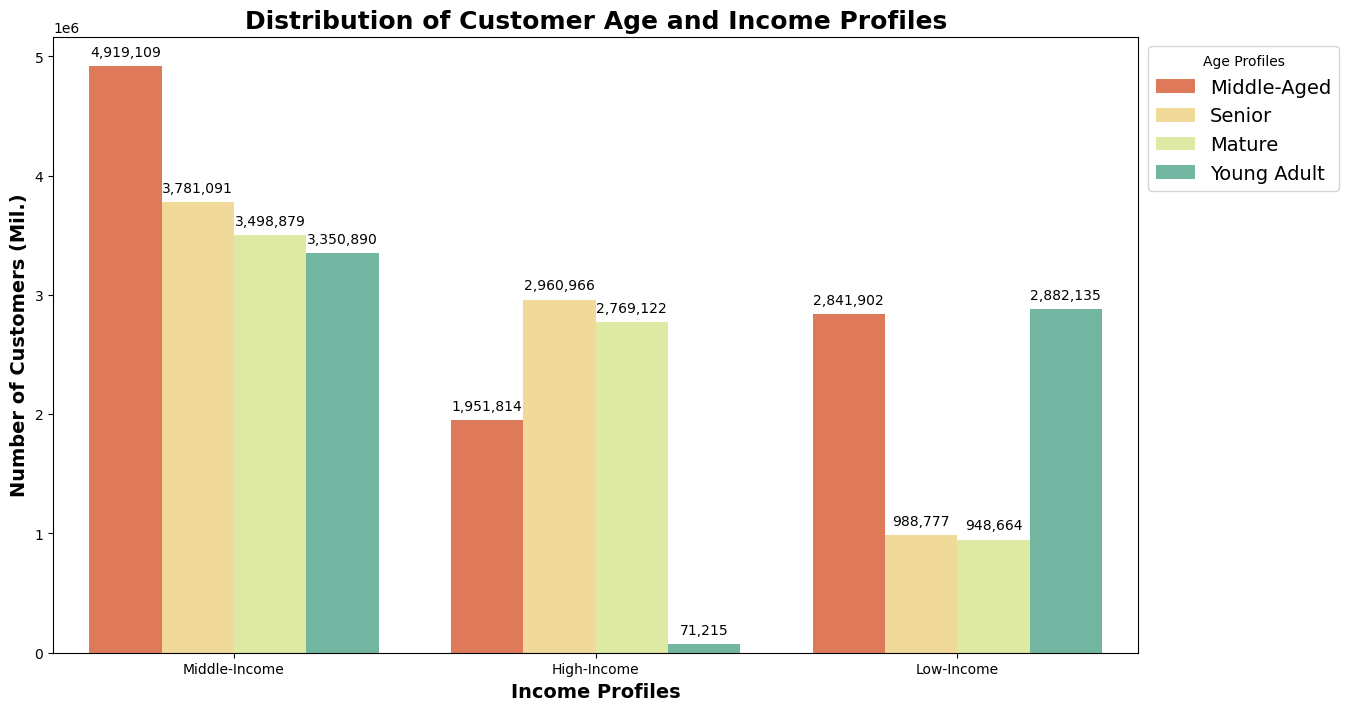

In [35]:
# Calculate profile distribution
profile_distribution = df_active_customers[['income_flag', 'age_flag']].value_counts().reset_index(name='count')

# Plot the bar chart 
plt.figure(figsize=(14, 8))
bar_profile = sns.barplot(x='income_flag', y='count', hue='age_flag', data=profile_distribution, palette='Spectral')

# Create the legend
bar_profile.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Age Profiles', fontsize=14)

# Set font size and weight for axes names
plt.title('Distribution of Customer Age and Income Profiles', fontsize=18, weight='bold')
plt.xlabel('Income Profiles', fontsize=14, weight='bold')
plt.ylabel('Number of Customers (Mil.)', fontsize=14, weight='bold')

# Annotate each bar with the count on top
for p in bar_profile.patches:
    bar_profile.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
    
plt.show()

In [36]:
# Saving the bar chart to .PNG
bar_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_distribution.png'), bbox_inches='tight')

# 7. Aggregating usage frequency and expenditure by customer profile

In [37]:
# Group by 'age_income_profile' and calculate max, mean, and min for 'order_freq' and 'prices'
profile_aggregation = df_active_customers.groupby('age_income_profile').agg({
    'order_freq': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

# Rename columns for better readability
profile_aggregation.columns = ['Customer Profile', 'Orders (Max)', 'Orders (Avg)', 'Orders (Min)', 'Expenditure (Max)', 'Expenditure (Avg)', 'Expenditure (Min)']

# Display the aggregated results
profile_aggregation

,Customer Profile,Orders (Max),Orders (Avg),Orders (Min),Expenditure (Max),Expenditure (Avg),Expenditure (Min)
0,High-Income Mature,30.0,9.904213,0.0,25.0,7.947656,1.0
1,High-Income Middle-Aged,30.0,9.892623,0.0,25.0,7.949539,1.0
2,High-Income Senior,30.0,9.841913,0.0,25.0,7.958550,1.0
3,High-Income Young Adult,30.0,9.009226,2.0,25.0,7.792696,1.0
4,Low-Income Mature,30.0,10.378540,0.0,25.0,6.694619,1.0
5,Low-Income Middle-Aged,30.0,10.163924,0.0,25.0,7.409809,1.0
6,Low-Income Senior,30.0,10.431675,0.0,25.0,6.697215,1.0
7,Low-Income Young Adult,30.0,10.099356,0.0,25.0,7.580803,1.0
8,Middle-Income Mature,30.0,9.949334,0.0,25.0,7.958285,1.0
9,Middle-Income Middle-Aged,30.0,9.831396,0.0,25.0,7.957144,1.0


## Observations:

1. **Customer Profiles and Orders:**
   - All customer profiles have a maximum of 30 orders, indicating a consistent maximum order count across different income and age groups.
   - The average number of orders ranges from approximately 9 to 10, with some variation among different customer profiles.
   - The minimum order count is consistently 0, suggesting that some customers in each profile did not make any orders.

2. **Customer Profiles and Expenditure:**
   - The maximum expenditure for all customer profiles is $25.0, indicating a consistent upper limit on spending regardless of income and age.
   - Average expenditure varies between profiles, with the highest average spending observed in the 'High-Income Mature' profile.
   - The minimum expenditure is consistently 1.0, except for the 'High-Income Young Adult' profile, where it is 2.0.

3. **Overall Trends:**
   - Customers in the 'Low-Income Mature' profile have the highest average expenditure but a similar maximum expenditure as other profiles.
   - The 'Low-Income Senior' profile has the highest maximum order count but relatively lower average and minimum expenditures.
   - 'High-Income Young Adult' customers have the lowest minimum order count but a relatively high average expenditure.

These observations provide insights into the ordering and spending patterns of different customer profiles, helping in understanding their behavior and preferences.

# 8. Comparing customer profiles with regions and departments

## 8a. Comparing customer profiles with regions

In [38]:
# Checking the frequncy of customer profiles across regions
df_active_customers[['age_income_profile', 'Region']].value_counts().reset_index(name='Count')

,age_income_profile,Region,Count
0,Middle-Income Middle-Aged,South,1653729
1,Middle-Income Senior,South,1245273
2,Middle-Income Middle-Aged,West,1243763
3,Middle-Income Middle-Aged,Midwest,1175922
4,Middle-Income Mature,South,1160688
5,Middle-Income Young Adult,South,1130473
6,High-Income Senior,South,974851
7,Low-Income Young Adult,South,970401
8,Middle-Income Senior,West,967699
9,Low-Income Middle-Aged,South,950320


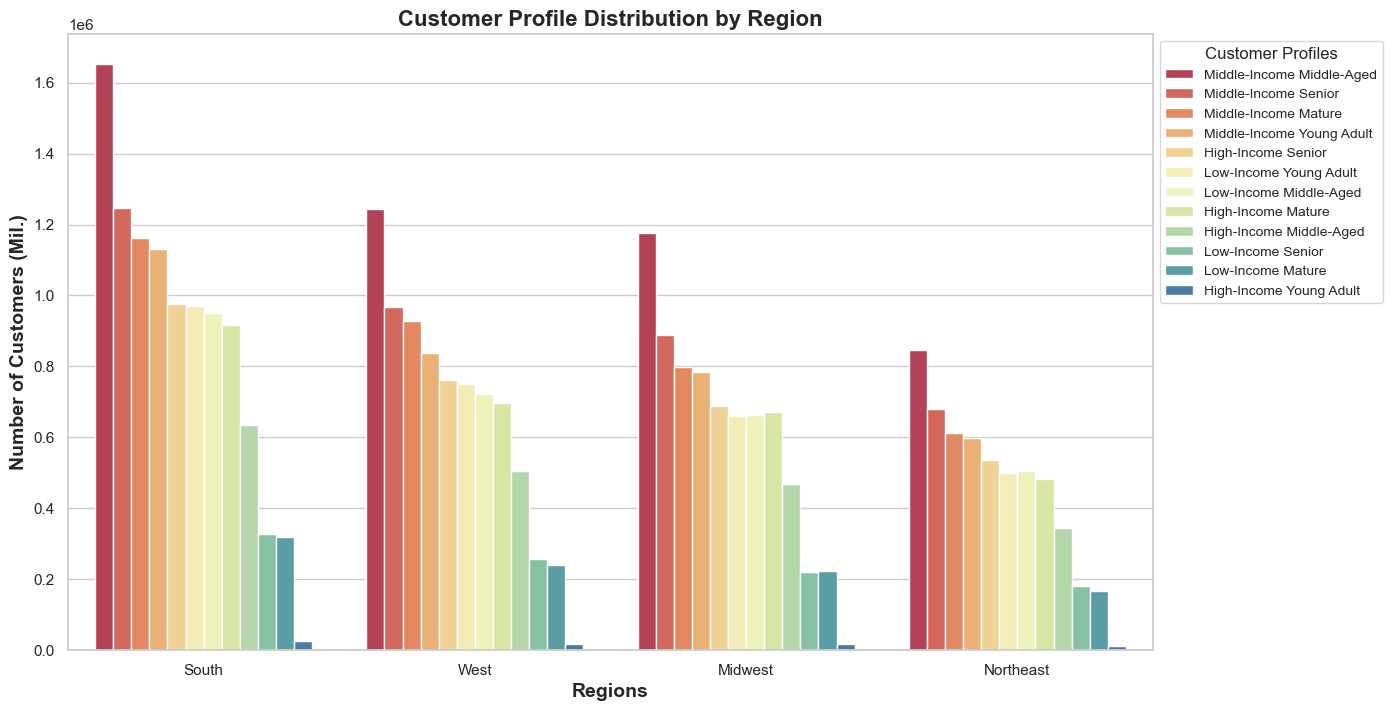

In [39]:
# Defining profile_per_region for visualization
profile_per_region = df_active_customers[['age_income_profile', 'Region']].value_counts().reset_index(name='count')

# Setting the style
bar_profile_per_region = sns.set(style="whitegrid")

# Setting up the matplotlib figure
bar_profile_per_region = plt.figure(figsize=(14, 8))

# Creating a grouped bar plot
sns.barplot(x='Region', y='count', hue='age_income_profile', data=profile_per_region, palette='Spectral')

# Setting plot labels and title
plt.title('Customer Profile Distribution by Region', fontsize=16, weight='bold')
plt.xlabel('Regions', fontsize=14, weight='bold')
plt.ylabel('Number of Customers (Mil.)', fontsize=14, weight='bold')

# Setting the legend
plt.legend(title='Customer Profiles', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')

# Showing the plot
plt.show()

In [40]:
bar_profile_per_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_per_region.png'), bbox_inches='tight')

## Observations:

1. The majority of customers fall into the "Middle-Income Middle-Aged" profile, and the highest counts are observed in the South region (1653729), followed by the West (1243763) and Midwest (1175922) regions.

2. The "Middle-Income Senior" profile is also prevalent, with the highest counts in the South (1245273) and West (967699) regions.

3. In the South region, "Middle-Income Mature," "Middle-Income Young Adult," and "High-Income Senior" profiles show substantial counts, indicating diversity in customer profiles.

4. The "Low-Income" profiles have considerable counts, particularly in the South region, with "Low-Income Young Adult" having a count of 970401.

5. The Northeast region generally has lower counts compared to other regions, and "High-Income Middle-Aged" and "High-Income Mature" profiles have relatively lower counts across all regions.

6. The "High-Income Young Adult" profile has lower counts compared to other profiles, with the highest count in the South region (26028).

These observations provide insights into the distribution of customer profiles across different age-income categories and regions.

## 8b. Comparing customer profiles with departments

In [41]:
# Assigning names to department IDs
department_info = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol', 6: 'international',
    7: 'beverages', 8: 'pets', 9: 'dry goods pasta', 10: 'bulk', 11: 'personal care',
    12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs',
    17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli',
    21: 'missing',
}

# Creating a mapping dictionary for department_id to Department_Name
department_mapping = dict(department_info)

# Mapping department_id to names in the dataframe
df_active_customers['department_name'] = df_active_customers['department_id'].map(department_mapping)

/var/folders/6c/bwpb08p57j1fmq58t70xfnf80000gq/T/ipykernel_79890/1525251238.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active_customers['department_name'] = df_active_customers['department_id'].map(department_mapping)


In [42]:
# Displays all rows when listed

pd.options.display.max_rows = None

In [43]:
# Checking the frequncy of customer profiles across departments
df_active_customers[['age_income_profile', 'department_name']].value_counts().reset_index(name='count')

,age_income_profile,department_name,count
0,Middle-Income Middle-Aged,produce,1480433
1,Middle-Income Senior,produce,1137592
2,Middle-Income Mature,produce,1054710
3,Middle-Income Young Adult,produce,1012615
4,High-Income Senior,produce,882489
5,Middle-Income Middle-Aged,dairy eggs,841983
6,High-Income Mature,produce,823763
7,Low-Income Young Adult,produce,816568
8,Low-Income Middle-Aged,produce,802096
9,Middle-Income Senior,dairy eggs,642145


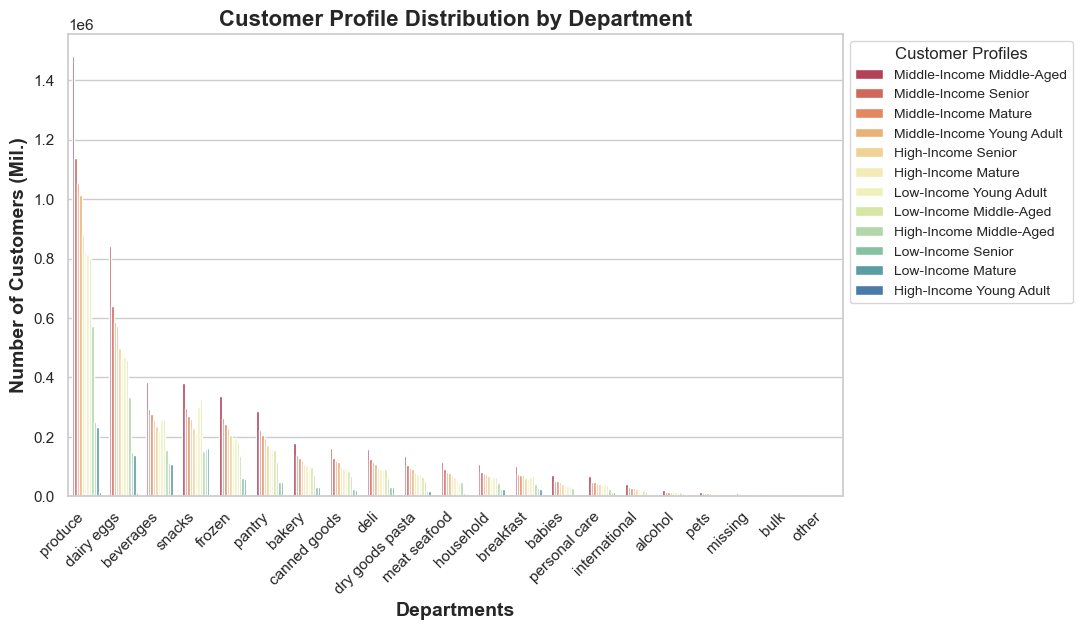

In [44]:
# Defining profile_per_department for visualization
profile_per_department = df_active_customers[['age_income_profile', 'department_name']].value_counts().reset_index(name='count')

# Setting the style
bar_profile_per_department = sns.set(style="whitegrid")

# Setting up the matplotlib figure
bar_profile_per_department = plt.figure(figsize=(10, 6))

# Creating a grouped bar plot with rotated x-axis labels
sns.barplot(x='department_name', y='count', hue='age_income_profile', data=profile_per_department, palette='Spectral')
plt.xticks(rotation=45, ha='right')

# Setting plot labels and title
plt.title('Customer Profile Distribution by Department', fontsize=16, weight='bold')
plt.xlabel('Departments', fontsize=14, weight='bold')
plt.ylabel('Number of Customers (Mil.)', fontsize=14, weight='bold')

# Setting the legend
plt.legend(title='Customer Profiles', bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')

# Show the plot
plt.show()

In [45]:
bar_profile_per_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_per_department.png'), bbox_inches='tight')

## Observations:

1. The "Middle-Income Middle-Aged" age-income profile is dominant across various departments, with the highest counts in "produce" (1480433), followed by "dairy eggs" (841983) and "snacks" (382983).

2. "Produce" is a popular department across all age-income profiles, indicating a common preference for fresh and perishable items.

3. The "High-Income Senior" profile has significant counts in "produce" (882489) and "dairy eggs" (500555), suggesting a preference for high-quality and possibly premium products.

4. "Low-Income" profiles have substantial counts in various departments, with "produce," "dairy eggs," and "snacks" being prominent.

5. The "Middle-Income Young Adult" profile shows balanced counts across different departments, including "produce," "dairy eggs," "snacks," and "beverages."

6. The "High-Income Young Adult" profile has relatively lower counts compared to other profiles, with notable counts in "produce," "dairy eggs," and "frozen."

7. "Bakery" and "deli" departments have considerable counts across different age-income profiles, indicating popularity for ready-to-eat and bakery items.

8. The "bulk" and "other" departments have lower counts across most profiles, suggesting that these items may not be as popular among customers.

These observations provide insights into the distribution of customers across different age-income profiles within specific departments, highlighting preferences and trends in product categories.

In [46]:
df_active_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  float64 
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  spending_freq           float64 
 21  spending_fl

In [48]:
# Save the final dataset

df_active_customers.to_pickle(os.path.join(path, '02 Data', '00 Prepared Data', 'orders_products_all.pkl'))